In [1]:

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import cPickle as pickle

In [28]:
FP_USERS = ['/tmp/tibor']
GP_USERS = ['/tmp/tibor']

In [38]:
newrhoana = 'ui_results.p'
times = 'times.p'
corrections = 'corrections.p'
correction_vis = 'correction_vis.p'

In [39]:
with open(FP_USERS[0]+'/'+newrhoana, 'rb') as f:
    fp_newrhoana = pickle.load(f)
with open(FP_USERS[0]+'/'+times, 'rb') as f:
    fp_times = pickle.load(f)
    fp_times = [int(v) for v in fp_times]
with open(FP_USERS[0]+'/'+corrections, 'rb') as f:
    fp_corrections = pickle.load(f)       
with open(FP_USERS[0]+'/'+correction_vis, 'rb') as f:
    fp_correction_vis = pickle.load(f)       

In [15]:
with open(GP_USERS[0]+'/'+newrhoana, 'rb') as f:
    gp_newrhoana = pickle.load(f)
with open(GP_USERS[0]+'/'+times, 'rb') as f:
    gp_times = pickle.load(f)
    gp_times = [int(v) for v in gp_times]
with open(GP_USERS[0]+'/'+corrections, 'rb') as f:
    gp_corrections = pickle.load(f)    

In [7]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


In [32]:
gp.Legacy.VI(gold, rhoana)[0]

0.51456962217066438

In [31]:
gp.Legacy.VI(gold, fp_newrhoana)[0]

0.51728388760729882

In [12]:
gp.Legacy.VI(gold, gp_newrhoana)[1]

0.46162534464714744

In [33]:
fp_corrections

[['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current'],
 ['split', 'current']]

In [20]:
gp_corrections

[['merge', '1'],
 ['merge', 'current'],
 ['merge', '1'],
 ['merge', '1'],
 ['merge', '1'],
 ['merge', 'current'],
 ['merge', '1'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', '1'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['merge', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1'],
 ['split', '1'],
 ['split', '1'],
 ['split', 'current'],
 ['split', '1']]

In [21]:
np.mean(gp_times)

2023.5999999999999

In [34]:
np.mean(fp_times)

9269.322580645161

In [24]:
len(gp_corrections)

50

In [41]:
data = []
for vi in fp_correction_vis:
    data.append(vi[0])

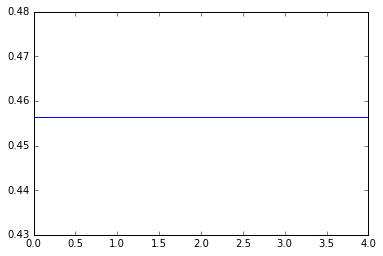

In [42]:
plt.plot(data)

In [44]:
len(fp_correction_vis)

5

In [45]:
fp_correction_vis

[[0.4564952264711417,
  0.4293922557471461,
  0.41812625771753,
  0.4176715560855522,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6552543410401137,
  0.5969316476257118],
 [0.4564952264711417,
  0.4293922557471461,
  0.41812625771753,
  0.434362913440542,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6552543410401137,
  0.5969316476257118],
 [0.4564952264711417,
  0.4293922557471461,
  0.41812625771753,
  0.43761226289272237,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6552543410401137,
  0.5969316476257118],
 [0.4564952264711417,
  0.4293922557471461,
  0.41812625771753,
  0.43761226289272237,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6636033798976264,
  0.5969316476257118],
 [0.4564952264711417,
  0.4293922557471461,
  0.41812625771753,
  0.43761226289272237,
  0.49071969954324857,
  0.4

In [ ]:
for vi in fp_correction_vis:
    for vi2 in fp_correction_vis:
        if check

In [46]:
def checkEqual1(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == rest for rest in iterator)

In [47]:
t1 = 10
t2 = 11
t3 = 14
t4 = 15

In [53]:
tt = t1+t2+t3+t4
a = np.ones((tt, 4, 75,75), dtype=np.float32)

In [54]:
a[0:t1] = np.zeros((t1,4,75,75),dtype=np.float32)

In [55]:
a[t1:t1+t2] = np.zeros((t2,4,75,75),dtype=np.float32)
a[t2:t2+t3] = np.zeros((t3,4,75,75),dtype=np.float32)
a[t3:t3+t4] = np.zeros((t4,4,75,75),dtype=np.float32)


In [56]:
a[-1]

array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       